#### AI
    - 머신러닝, 컴퓨터 비전, 자연어 처리, 로봇 공학 등 그와 관련된 모든 주제를 포괄하는 개념

#### Machine Learning
    - 더 많은 데이터 축적
    
#### Deep Learning
    - 신경망(Neural Network)을 부르는 다른 이름
    - 여러 개의 히든 레이어를 통해 깊게 학습한다고 해서 붙여진 이름

---
#### Machine Learing 과 DataMining
    - 머신러닝은 훈련 데이터를 통해 삭습된 알려진 속성을 기반으로 한 예측에 중점
    - 데이터 마이닝은 데이터의 미처 몰랐던 속성을 발겨하는 것에 집중 (이는 데이터베이스의 지식 발견 부분의 분석 절차에 해당)
    - 이들은 방법적으로 중복되는 부분이 있음. 데이터마아닝에서는 머신러닝은 필수가 아니지만 머신러닝에서는 데이터마이닝이 필수라는 부분이 다르다.

---
### 머신러닝의 종류
#### 1. 지도학습(교사학습)
    - 회귀(Regression)
            + 선형회귀
            
    - 분류(Classfication)
            + 로지스틱 선형회귀
            + KNN
            + Decision Tree
            + Random Forest
            + SYM
            + Navie Bayes
            + Neural Network
            
#### 2. 비지도학습
    - 군집(Clustering)
            + K-means
            + DBSCAN

    - 차원 축소
            + PCA
            
#### 3. 강화학습
    - 완전한 답을 제공하지 않음
    - 보상 시스템

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/나눔고딕.ttf').get_name() #한글이 꺠지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split

#### 머신러닝 전용 패키지
sklearn(사이킷 런)

In [3]:
#!pip install mglearn #책에서 제공하는 공부용 패키지
import mglearn

### 샘플소개

Text(0, 0.5, '두번째 특성')

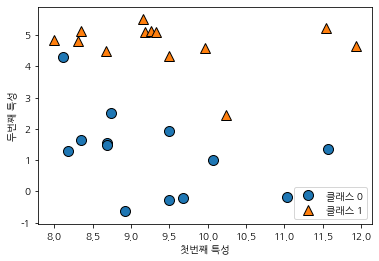

In [16]:
# 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()
X
y

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0","클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

(-3.0, 3.0)

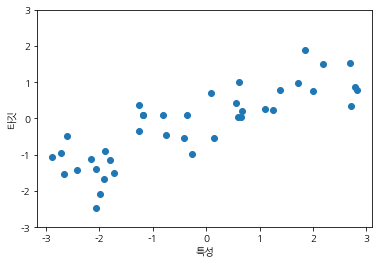

In [17]:
# 회귀분석용 샘플
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.xlabel("특성")
plt.ylabel("타깃")
plt.ylim(-3,3)

In [19]:
from sklearn.datasets import load_breast_cancer # 의학용 샘플

cancer = load_breast_cancer()
print(cancer.keys())
cancer.data
cancer.target
# print(cancer, DESCR)
type(cancer)
cancer.data.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [21]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape

(506, 13)

---
### 과대 적합
    - 훈련 데이터셋의 각 샘플에 너무 가깝에 맞춰져 있어 복잡한 모델을 만든느 것
        - 해결법 : 1. 파라미터 수가 적은 모델을 선택하거나, 훈련 데이터에 있는 특성 수를 줄이거나, 모델에 제약을 가해 단순화
                   2. 훈련데이터를 더 많이 모은다.
                   3. 훈련데이터의 잡음을 줄인다.
    
### 과소 적합
    - 너무 간단한 모델이 선택되는 것
    
### 일반화
    - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

---
### KNN(K-Nearest Neighbors)
#### 1) 특징
    - 이해하기 쉽고 직관적인 모델
    - 더 복잡한 알고리즘을 적용하기 전 시도해볼 수 있는 알고리즘
    - 훈련셋이 너무 크면 예측이 느려짐
    
#### 2) 파라미터
    - 이웃의 개수(k)
    - 데이터 사이의 거리를 재는 방법 : L2 norm

C:\Users\User_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


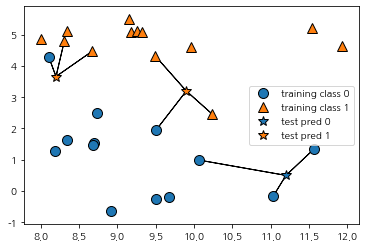

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

---
#### L1 norm, L2 norm

- L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리
    
    
- L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스의 정리, 유클리드 거리

In [34]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns=['x','y']
df

,x,y
0,1,1
1,9,8
2,6,4


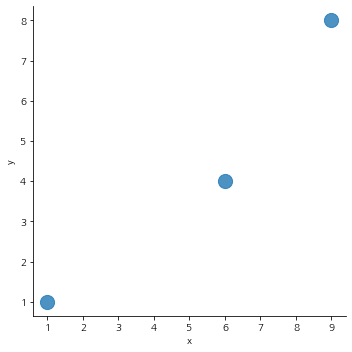

In [35]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200})

In [59]:
from numpy import linalg

dt_point = df.values
dt_point

# (0,0)으로 부터 어디가 제일 가까울까?
linalg.norm(dt_point, ord=2, axis=1)

array([3.46410162, 3.16227766, 2.23606798])

In [40]:
# L1 norm으로 계산
# 3명이 주사위를 3번 던진 후 걸음 수를 측정
df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3,3)))
df.columns = ['move_1','move_2','move_3']
df

# 누가 가장 많이 걸었을까?
walk = df.values
linalg.norm(walk, ord=1, axis=1)

array([6., 4., 3.])

### KNN 구현

In [44]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #random_state 난수고정
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


C:\Users\User_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [63]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [64]:
clf.score(X_test, y_test) 

0.8571428571428571

## KNN 분석

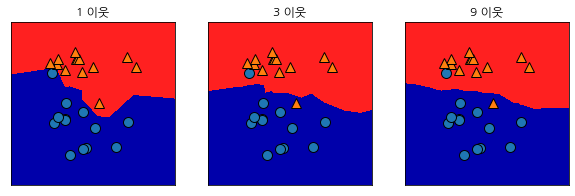

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neigh, ax in zip([1,3,9], axes):
    #print(n_neigh)
    #print(ax)
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X, y)
    
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax)
    
    ax.set_title("{} 이웃".format(n_neigh))

In [114]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [116]:
clf.score(X_train, y_train)

0.9389671361502347

In [117]:
clf.score(X_test, y_test)

0.9370629370629371

In [118]:
train_acc = []
test_acc = []

for n_neigh in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

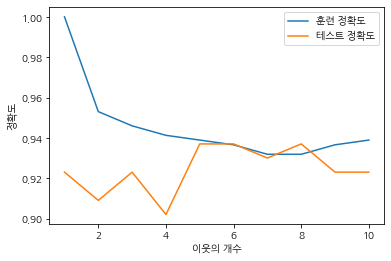

In [119]:
plt.plot(range(1,11), train_acc, label='훈련 정확도')
plt.plot(range(1,11), test_acc, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('이웃의 개수')
plt.legend()

In [120]:
test_acc[6] #이웃이 적을수록 복잡도 증가

0.9300699300699301

## 회귀분석을 위한 KNN

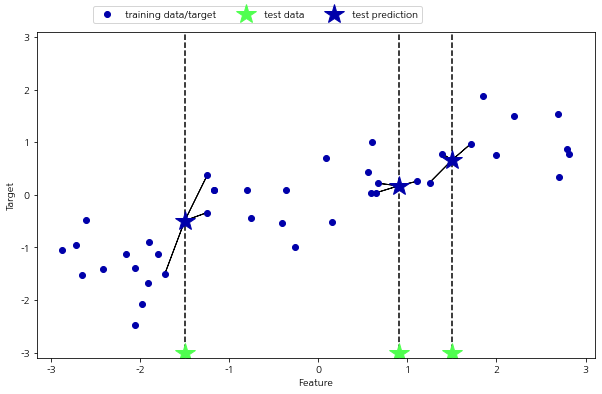

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25) #random_state 난수고정
print(X_train.shape, y_test.shape)

(30, 1) (10,)


In [19]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print('설명 계수(R^2) : ', reg.score(X_test, y_test))

설명 계수(R^2) :  0.8344172446249605


In [8]:
X_test

array([[-1.24713211],
       [ 0.67111737],
       [ 1.71105577],
       [-2.06388816],
       [-2.87649303],
       [-1.89957294],
       [ 0.55448741],
       [ 2.81945911],
       [-0.40832989],
       [-2.72129752]])

In [9]:
reg.predict([[-1.24713211]])

array([-0.05396539])

In [10]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

## KNeighborsRegressor 분석

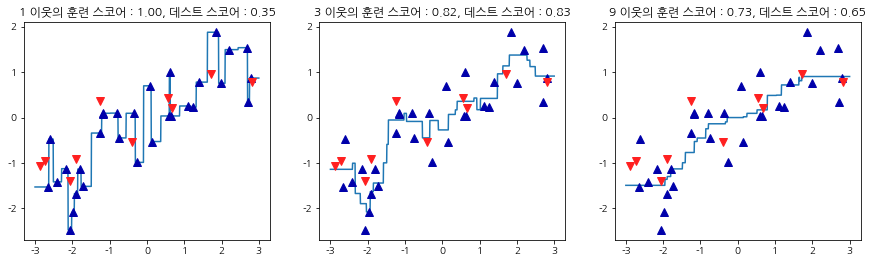

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neigh, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^",c=mglearn.cm2(0), markersize=8) # 훈련용 데이터에 표시, 색깔, 크기 - 현재 너무 잘 맞는데 훈련용에
    ax.plot(X_test, y_test, "v",c=mglearn.cm2(1), markersize=8) # 데스트용 데이터에 표시, 색깔, 크기 
    
    ax.set_title("{0} 이웃의 훈련 스코어 : {1:.2f}, 데스트 스코어 : {2:.2f}".format(n_neigh, reg.score(X_train, y_train), reg.score(X_test, y_test)))

## iris를 이용한 사례

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이 1cm, 폭은 0.2cm

s_height = 5.0
s_width = 2.0
p_height = 1.0
p_width = 0.2

In [26]:
# 학습, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0) # random_state값이 달라지면 다 달라진다.
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [27]:
# 이웃의 갯수 5개로 훈련시키기
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train) 
clf.score(X_test, y_test)

0.9736842105263158

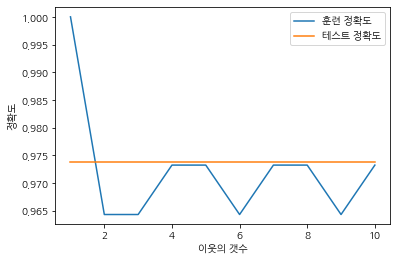

In [28]:
# 적절한 이웃의 갯수 정하기
train_acc = []
test_acc = []

for n_neigh in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train,y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(range(1,11), train_acc, label="훈련 정확도")
plt.plot(range(1,11), test_acc, label="테스트 정확도")

plt.xlabel("이웃의 갯수")
plt.ylabel("정확도")
plt.legend()

# 이웃의 갯수 4개가 적절

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

In [30]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [31]:
import numpy as np
x_my_iris = np.array([[5, 2, 1, 0.2]])
print("예측 한 붓꽃 : {}".format(
    iris['target_names'][(clf.predict(x_my_iris))]))

예측 한 붓꽃 : ['setosa']


In [32]:
print("테스트 세트에 대한 정확도 : {}".format(clf.score(X_test, y_test)))

테스트 세트에 대한 정확도 : 0.9736842105263158


### 풀이

In [33]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이 1cm, 폭은 0.2cm

s_height = 5.0
s_width = 2.9
p_height = 1.0
p_width = 0.2

In [34]:
# 학습, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0) # random_state값이 달라지면 다 달라진다.
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F7194B80>,
      dtype=object)

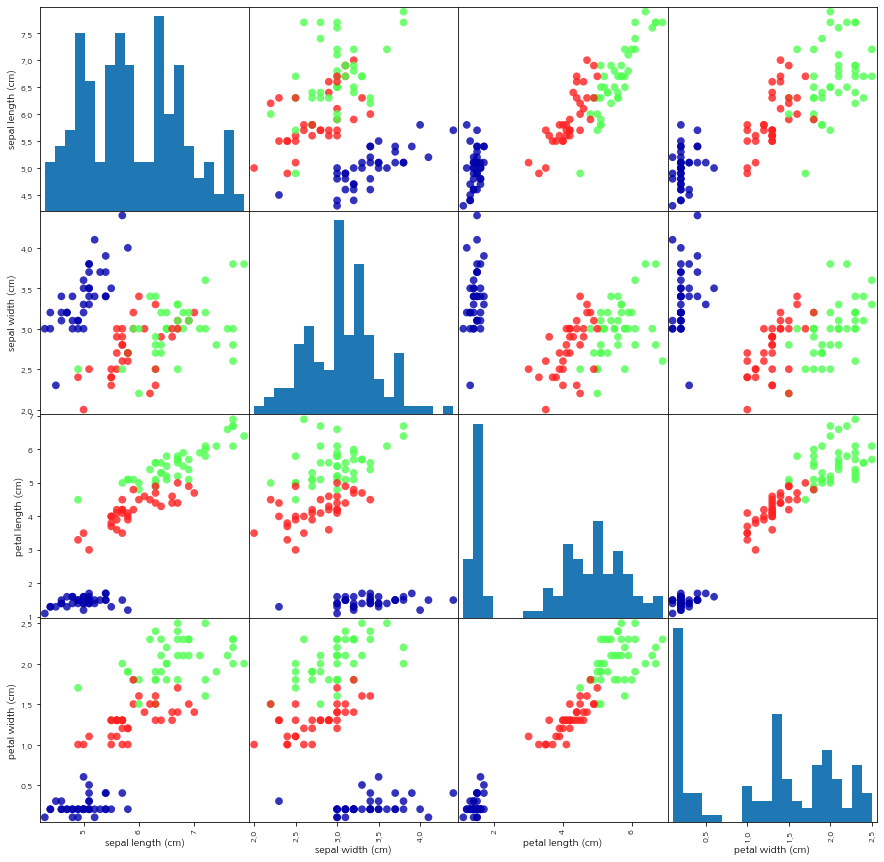

In [35]:
# 산점도 행렬
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker='o', s=60, cmap=mglearn.cm3, c=y_train, alpha=.8, hist_kwds={"bins":20})

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
print(knn.score(X_test,y_test))

pred = knn.predict(X_test)
print(np.mean(pred == y_test))

0.9736842105263158
0.9736842105263158


In [38]:
X_new = np.array([[s_height, s_width, p_height, p_width]])
pred = knn.predict(X_new)
print("붓꽃의 품종은? ", iris.target_names[pred])

붓꽃의 품종은?  ['setosa']


### 영화 분류 프로그램 만들기

In [185]:
import operator 

def createDataSet():
    group = np.array([[1.0,2.0],[1.0,4.0],[4.0,1.0],[4.0,2.0]])
    label = ['Action','Action','Romance','Romance']
    return group, label

def calcDistance(X_new, data):
    # 데이터의 갯수
    dataSize = len(data) # data.shape[0]
    
    # 입력데이터와 기존 데이터의 차이
    diffMat = np.tile(X_new, (dataSize, 1)) - data
    
    # L2 norm
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    
    return distance.argsort()

def findMajorityClass(target, k, sortedDistance):
    classCount = {}
    
    for i in range(k):
        voteLabel = target[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

def classify(X_new, data, target, k):
    sortedDistance = calcDistance(X_new, data)
    sortedDistanceCount = findMajorityClass(target, k, sortedDistance)
    
    return sortedDistanceCount

In [186]:
X, y = createDataSet()
result = classify([2.0, 3.0], X, y, 3)
print("결과는 {} 영화다".format(result[0][0]))

결과는 Action 영화다


In [150]:
np.tile([2.0, 3.0], (4,1))

A = 1
B = np.array([0,1])
C = np.array([[0,1],[2,3]])

np.tile(A, 3)
np.tile(B, 3)
np.tile(C, 3)

np.tile(A, (2,3))
np.tile(B, (2,3))
np.tile(C, (2,3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])